In [1]:
import functions.preproc as pp

In [2]:
input_path = '/Users/caroleguedj/Desktop/PULSATION_ANAL/ToBIDS/BIDS_data/sourcedata/'
task = 'N2pc'
subject_id = '21'
output_path = '/Users/caroleguedj/Desktop/PULSATION_ANAL/ToBIDS/BIDS_data/derivative/'

In [29]:
raw, e_list = pp.load_data(subject_id=subject_id, task=task, input_path=input_path, plot_data=True)

Extracting EDF parameters from /Users/caroleguedj/Desktop/PULSATION_ANAL/ToBIDS/BIDS_data/sourcedata/sub-21/ses-01/eeg/sub-21_ses-01_task-N2pc_run-01_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 612351  =      0.000 ...   597.999 secs...
Extracting EDF parameters from /Users/caroleguedj/Desktop/PULSATION_ANAL/ToBIDS/BIDS_data/sourcedata/sub-21/ses-01/eeg/sub-21_ses-01_task-N2pc_run-02_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 578559  =      0.000 ...   564.999 secs...
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
969 events found
Event IDs: [    1     2     3     4     5     6     7     8   128 65536]
Using pyopengl with version 3.1.6
Channels marked as bad:
['C3', 'C4', 'FC2', 'FT8', 'PO4', 'O2']


In [30]:
raw = pp.filter_and_interpolate(subject_id=subject_id, task=task, raw=raw, output_path=output_path, plot_data=True)

Dropped channels: EXG7, EXG8
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6759 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-12 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-12 dB cutoff frequency: 33.75 Hz)
- Filter length: 3381 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.000 (s)
Interpolating bad channels
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 58 sensor positions
Interpolating 6 sensors


/Users/caroleguedj/micromamba/envs/mne/lib/python3.11/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


Using pyopengl with version 3.1.6
Overwriting existing file.
Writing /Users/caroleguedj/Desktop/PULSATION_ANAL/ToBIDS/BIDS_data/derivative/sub-21/preprocessing/raw/sub-21-raw-N2pc.fif


/Users/caroleguedj/Desktop/PULSATION_ANAL/Master_thesis/EEG/functions/preproc.py:119: RuntimeWarning: This filename (/Users/caroleguedj/Desktop/PULSATION_ANAL/ToBIDS/BIDS_data/derivative/sub-21/preprocessing/raw/sub-21-raw-N2pc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(os.path.join(output_path, f'sub-{subject_id}','preprocessing', 'raw', f'sub-{subject_id}-raw-{task}.fif'), overwrite=True)


Closing /Users/caroleguedj/Desktop/PULSATION_ANAL/ToBIDS/BIDS_data/derivative/sub-21/preprocessing/raw/sub-21-raw-N2pc.fif
[done]
Channels marked as bad:
['C3', 'C4', 'FC2', 'FT8', 'PO4', 'O2']


In [31]:
epochs = pp.epoch_data(subject_id=subject_id, task=task, raw=raw, e_list=e_list, output_path=output_path)

Not setting metadata
480 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 480 events and 1025 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Overwriting existing file.


/Users/caroleguedj/Desktop/PULSATION_ANAL/Master_thesis/EEG/functions/preproc.py:190: RuntimeWarning: This filename (/Users/caroleguedj/Desktop/PULSATION_ANAL/ToBIDS/BIDS_data/derivative/sub-21/preprocessing/epochs/sub-21-epochs-N2pc.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save(os.path.join(output_path, f'sub-{subject_id}', 'preprocessing', 'epochs', f'sub-{subject_id}-epochs-{task}.fif'), overwrite=True)


/Users/caroleguedj/micromamba/envs/mne/lib/python3.11/site-packages/autoreject/utils.py:66: UserWarning: 6 channels are marked as bad. These will be ignored. If you want them to be considered by autoreject please remove them from epochs.info["bads"].
  warnings.warn(


Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/58 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/58 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/480 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/4 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/480 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/480 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/480 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/480 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=3


/Users/caroleguedj/micromamba/envs/mne/lib/python3.11/site-packages/autoreject/utils.py:66: UserWarning: 6 channels are marked as bad. These will be ignored. If you want them to be considered by autoreject please remove them from epochs.info["bads"].
  warnings.warn(


  0%|          | Repairing epochs : 0/480 [00:00<?,       ?it/s]

Dropped 16 epochs: 0, 1, 15, 21, 24, 27, 41, 60, 66, 115, 189, 240, 398, 441, 469, 476
Directory created


/Users/caroleguedj/Desktop/PULSATION_ANAL/Master_thesis/EEG/functions/preproc.py:224: RuntimeWarning: This filename (/Users/caroleguedj/Desktop/PULSATION_ANAL/ToBIDS/BIDS_data/derivative/sub-21/preprocessing/ar_epochs/sub-21-ar_epochs-N2pc.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  ar_epochs.save(os.path.join(output_path, f'sub-{subject_id}', 'preprocessing', 'ar_epochs', f'sub-{subject_id}-ar_epochs-{task}.fif'), overwrite=True)


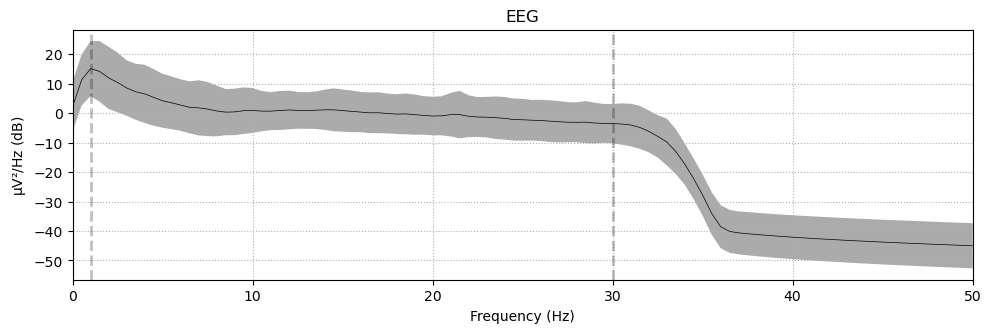

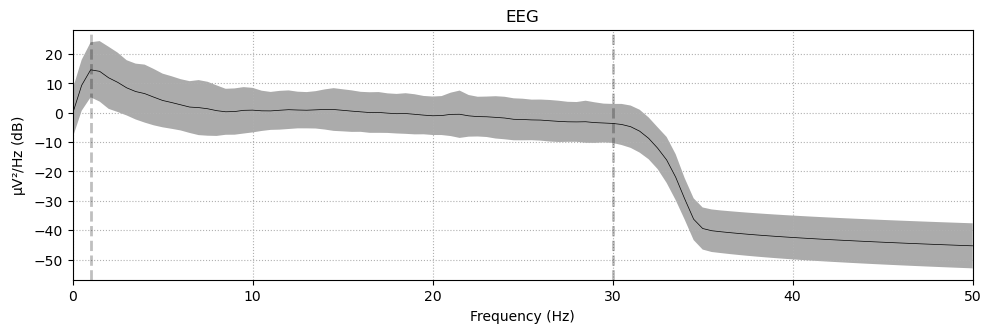

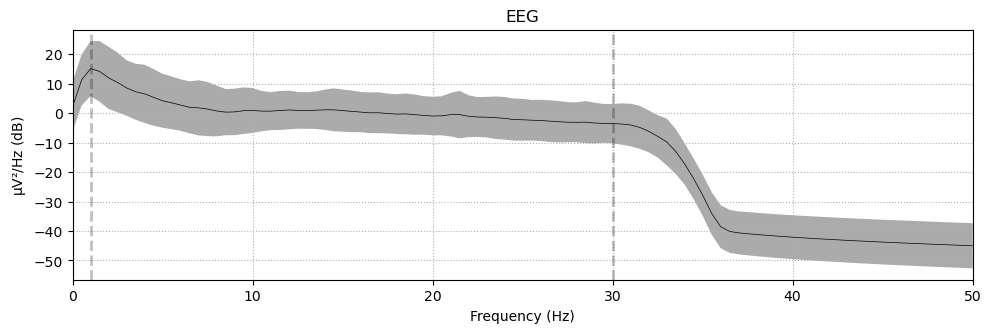

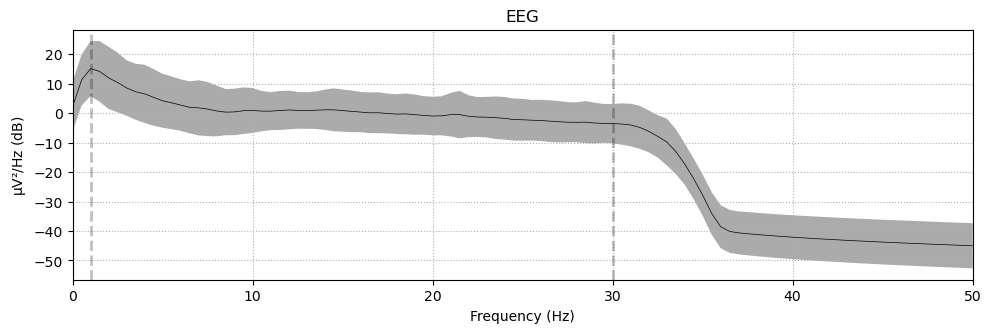

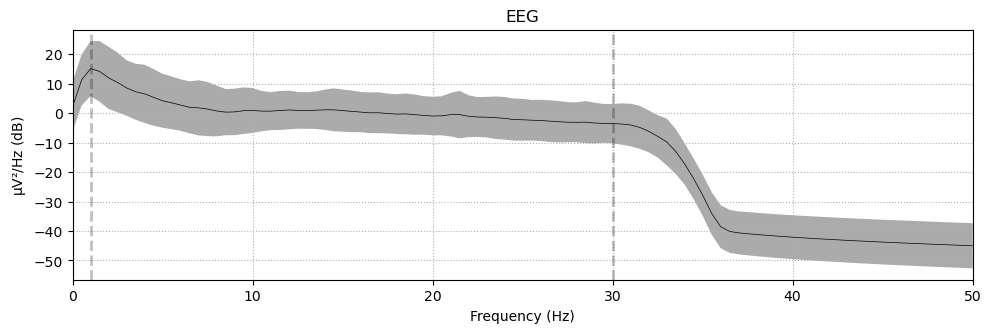

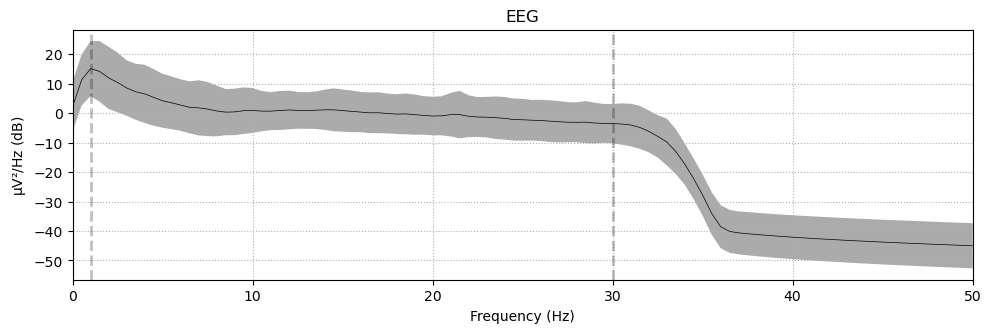

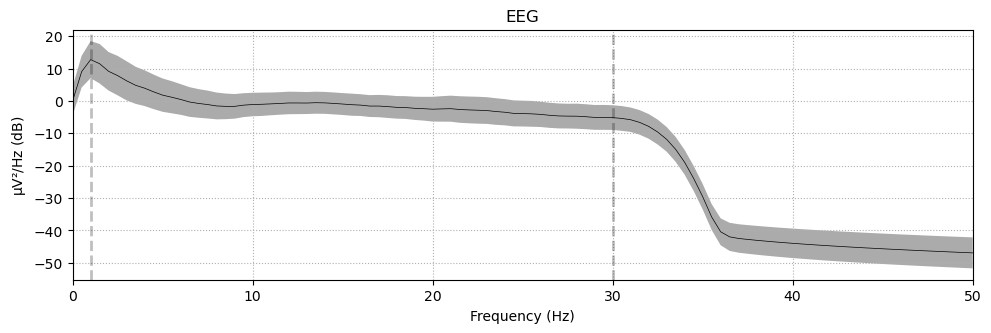

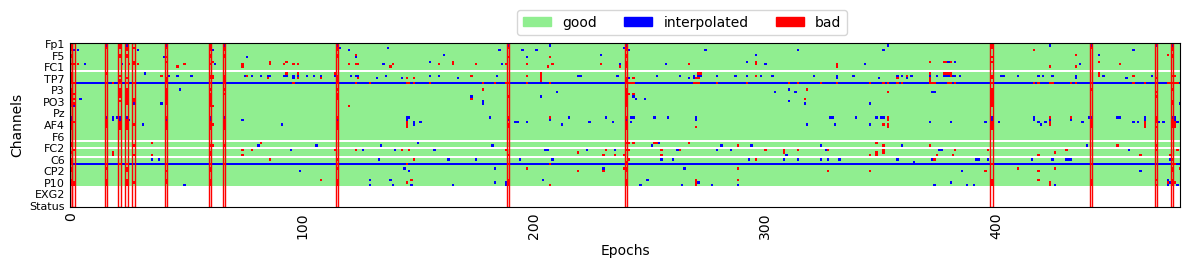

Directory created
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 640x480 with 2 Axes>

Directory created


In [32]:
ar_epochs, reject_log = pp.automated_epochs_rejection(subject_id=subject_id, task=task, epochs=epochs, output_path=output_path)

Fitting ICA to data using 58 channels (please be patient, this may take a while)


/Users/caroleguedj/Desktop/PULSATION_ANAL/Master_thesis/EEG/functions/preproc.py:283: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs[~reject_log.bad_epochs])


Selecting by non-zero PCA components: 57 components
Fitting ICA took 28.7s.


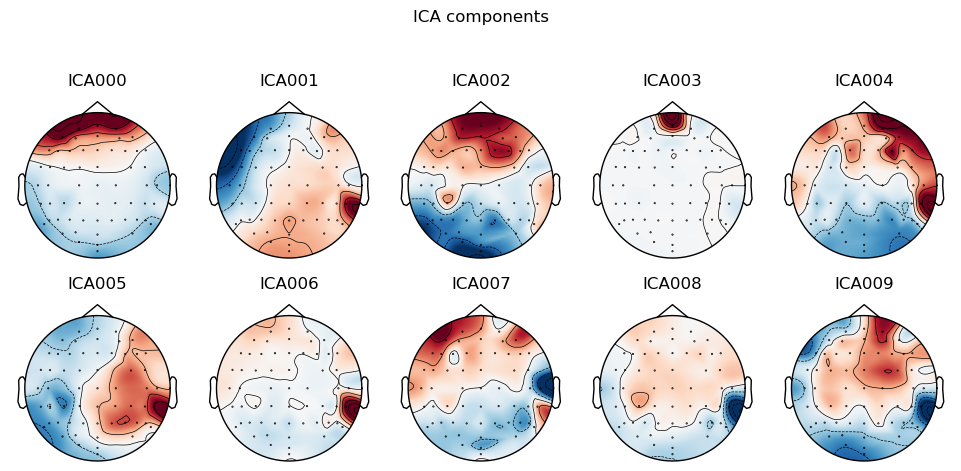

Chose a component to exclude (or 'done' to finish):  000
Chose a component to exclude (or 'done' to finish):  done


Components excluded : [0.0]
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying ICA to Evoked instance
    Transforming to ICA space (57 components)
    Zeroing out 1 ICA component
    Projecting back using 58 PCA components


/Users/caroleguedj/Desktop/PULSATION_ANAL/Master_thesis/EEG/functions/preproc.py:298: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  IC_removal = ica.plot_overlay(epochs.average(), exclude=ica.exclude)


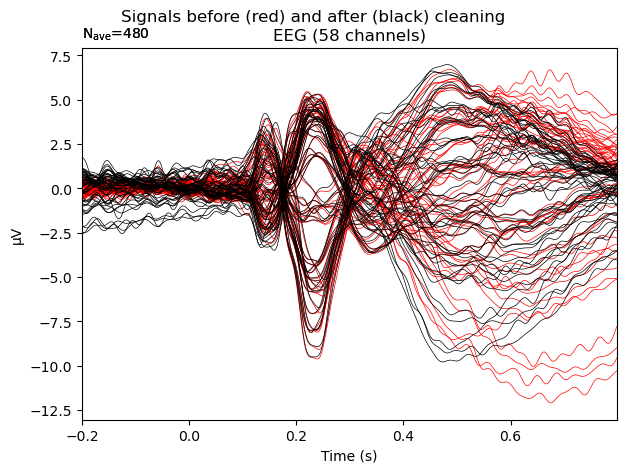

Applying ICA to Epochs instance
    Transforming to ICA space (57 components)
    Zeroing out 1 ICA component
    Projecting back using 58 PCA components


/Users/caroleguedj/Desktop/PULSATION_ANAL/Master_thesis/EEG/functions/preproc.py:299: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs_clean = ica.apply(ar_epochs, exclude=ica.exclude)


Applying baseline correction (mode: mean)
Directory created


/Users/caroleguedj/Desktop/PULSATION_ANAL/Master_thesis/EEG/functions/preproc.py:315: RuntimeWarning: This filename (/Users/caroleguedj/Desktop/PULSATION_ANAL/ToBIDS/BIDS_data/derivative/sub-21/cleaned_epochs/sub-21-cleaned_epochs-N2pc.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_clean.save(os.path.join(output_path, f'sub-{subject_id}', 'cleaned_epochs', f'sub-{subject_id}-cleaned_epochs-{task}.fif'), overwrite=True)


Directory created


In [33]:
epochs_clean = pp.clean_by_ICA(subject_id=subject_id, task=task, ar_epochs=ar_epochs, epochs=epochs, reject_log=reject_log, output_path=output_path)

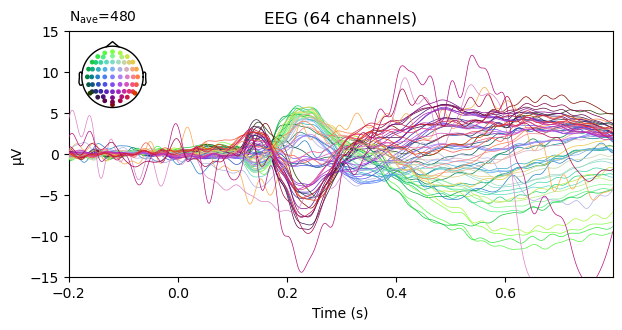

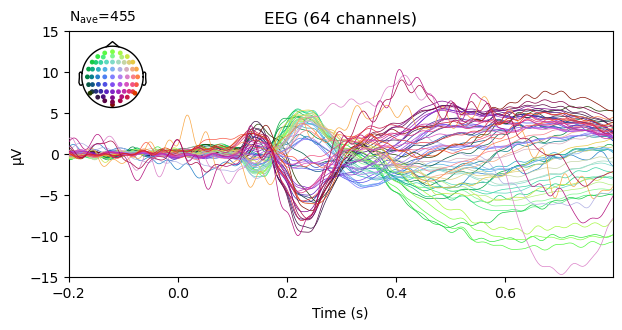

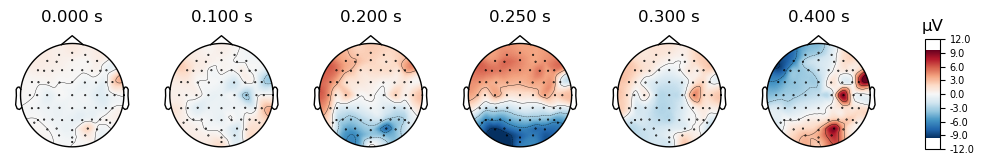

In [8]:
pp.quality_check_plots(subject_id=subject_id, task=task, epochs=epochs, epochs_clean=epochs_clean, output_path=output_path)